## parse dataset
This little section is not necessary for the purpose of teaching the algorithm. I could have downloaded the dataset from Kaggle, but I tried to download it from sklearn to try something different. The dataset was in json (dictionary) format, so I used this code to change it into a csv, so you can see how I did it. Working on csv, when the data is small enough, is quite comfrotable.

In [105]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

final = list()
for a, b in enumerate(iris['target']):
    final.append(list(iris['target_names'])[b])

df = pd.DataFrame(iris['data'])
df['label'] = pd.DataFrame(final)
df.index = df.pop('label')
df.columns = iris['feature_names']
df.to_csv('iris_dataset.csv')

## Decision Tree Classifier

In [109]:
import pandas as pd

df = pd.read_csv('iris_dataset.csv')
df

,label,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [70]:
X = df[list(df.columns[0:4])]
y = df[['label']]

In [71]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

fig = go.Figure()
for feature in list(df.columns[0:4]):
    fig.add_trace(go.Violin(y=df[feature],
        name=feature,
        box_visible=True,
        meanline_visible=True))

fig.show()

In [130]:
import plotly.express as px
df_iris = px.data.iris()
fig = px.parallel_coordinates(df_iris, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.24)

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

DecisionTreeClassifier(random_state=0)

In [102]:
#display(X_test[0:10])
clf.predict(X_test)

#show predicted dataset
pd.concat([X_test.reset_index(drop=True), pd.DataFrame(clf.predict(X_test))], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


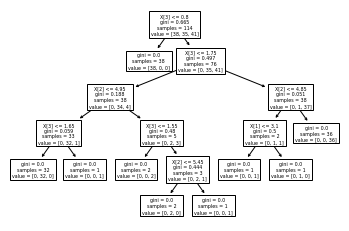

In [74]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(clf)
plt.savefig('out.pdf')
plt.show()

In [75]:
#cross_val_score(clf, X, y, cv=10)